Improved Model Accuracy: 0.94

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     10036
           1       0.98      1.00      0.99     10073
           2       1.00      1.00      1.00     10135
           3       0.97      1.00      0.99     10059
           4       1.00      1.00      1.00      9951
           5       0.85      0.82      0.83     10004
           6       0.90      0.96      0.93     10087
           7       0.90      0.94      0.92     10098
           8       0.89      0.77      0.82     10069

    accuracy                           0.94     90512
   macro avg       0.94      0.94      0.94     90512
weighted avg       0.94      0.94      0.94     90512



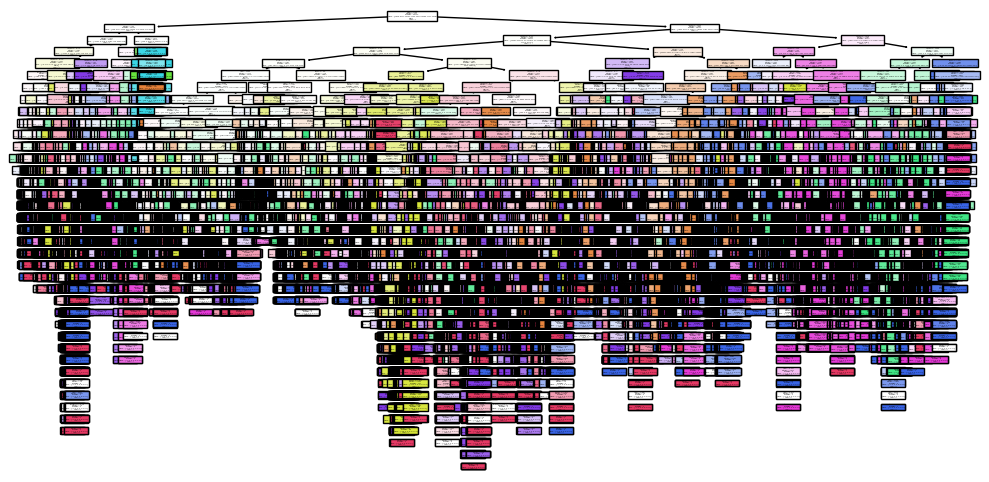

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = "D:\VS\data_transformed.csv"  # Update if needed
df = pd.read_csv(file_path)

# Drop irrelevant columns (Update based on your dataset)
drop_cols = ['Order ID', 'Date', 'ship-city', 'ship-state', 'ship-country']
df = df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore')

# Handle missing values
df = df.dropna()

# Convert categorical columns to numeric using Label Encoding
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features (X) and target variable (y)
target_col = 'Category'  # Update based on dataset
X = df.drop(columns=[target_col])
y = df[target_col]

# Standardize numerical features for better splits
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance using SMOTE
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_scaled, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_dt_model = grid_search.best_estimator_

# Predict on test data
y_pred = best_dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Improved Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(best_dt_model, feature_names=X.columns, class_names=[str(cls) for cls in np.unique(y)], filled=True)
plt.show()


In [ ]:
# Function to predict new sample
def predict_new_value(new_sample, label_encoders, scaler, model, feature_order):
    # Convert new sample to DataFrame
    new_sample_df = pd.DataFrame([new_sample])

    # Encode categorical features
    for col in label_encoders:
        if col in new_sample_df.columns:
            new_sample_df[col] = label_encoders[col].transform(new_sample_df[col])

    # Reorder columns to match the trained model
    new_sample_df = new_sample_df[feature_order]

    # Scale numerical features
    new_sample_scaled = scaler.transform(new_sample_df)

    # Predict
    predicted_category = model.predict(new_sample_scaled)[0]
    return predicted_category

# Ensure feature order matches the training set
feature_order = X.columns.tolist()  

# Example new data (update values based on your dataset)
new_sample = {
    'Fulfilment': 0,
    'Sales Channel ': 0,
    'ship-service-level': 1,
    'Age': 20,
    'Gender': 1,
    'Size': 10,
    'Courier Status': 0,
    'Qty': 2,
    'Amount': 500,
    'B2B': 1,
    'Month': 6
}

# Make prediction
predicted_category = predict_new_value(new_sample, label_encoders, scaler, best_dt_model, feature_order)
print(f"Predicted Category: {predicted_category}")


Predicted Category: 5


In [11]:
if predicted_category == 0:
    print("Blouse")
elif predicted_category == 1:
    print("Bottom")
elif predicted_category == 2:
    print("Dupatta")
elif predicted_category == 3:
    print("Ethnic Dress")
elif predicted_category == 4:
    print("Saree")
elif predicted_category == 5:
    print("Set")
elif predicted_category == 6:
    print("Top")
elif predicted_category == 7:
    print("Western Dress")
elif predicted_category == 8:
    print("Kurta")
else:
    print("Unknown Category")

    


Set
